Notebook purpose

- Sense-check and explore calculated account balances

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('/Users/fgu/dev/projects/entropy')
from entropy import config
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.figures.figures as figs

sns.set_style('whitegrid')
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
SAMPLE = 'X77'
fp = f'~/tmp/entropy_{SAMPLE}.parquet'

df = aws.read_parquet(fp)
print('Rows: {:,.0f}\nUsers: {}'.format(df.shape[0], df.user_id.nunique()))

Rows: 673,256
Users: 220


## Accounts

In [129]:
def make_data(df):
    return (df.loc[df.account_type.ne('other')]
            .set_index('date')
            .groupby(['account_type', 'account_id'], observed=True)
            .resample('M').id.count()
            .rename('num_txns')
            .reset_index())



d = make_data(df)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='num_txns', ylabel='account_type'>)

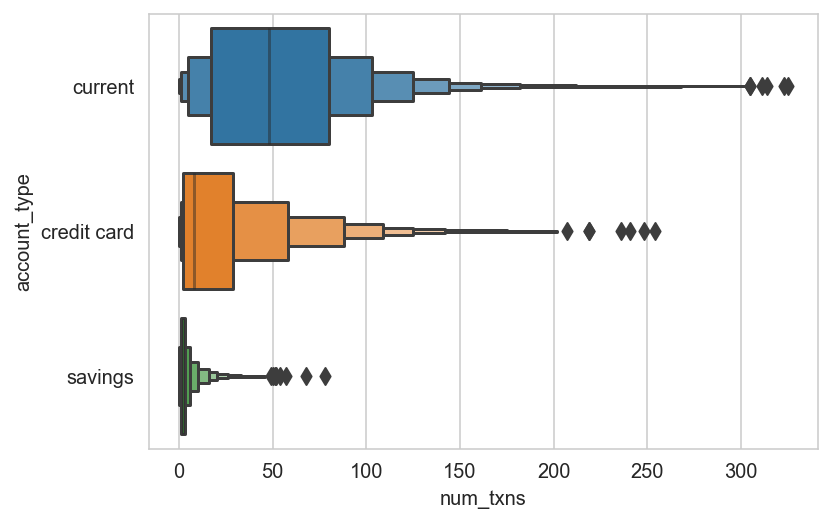

In [133]:
def make_plot(df):
    fig, ax = plt.subplots()
    ax = sns.boxenplot(data=df, x='num_txns', y='account_type')
    return fig, ax

make_plot(d)

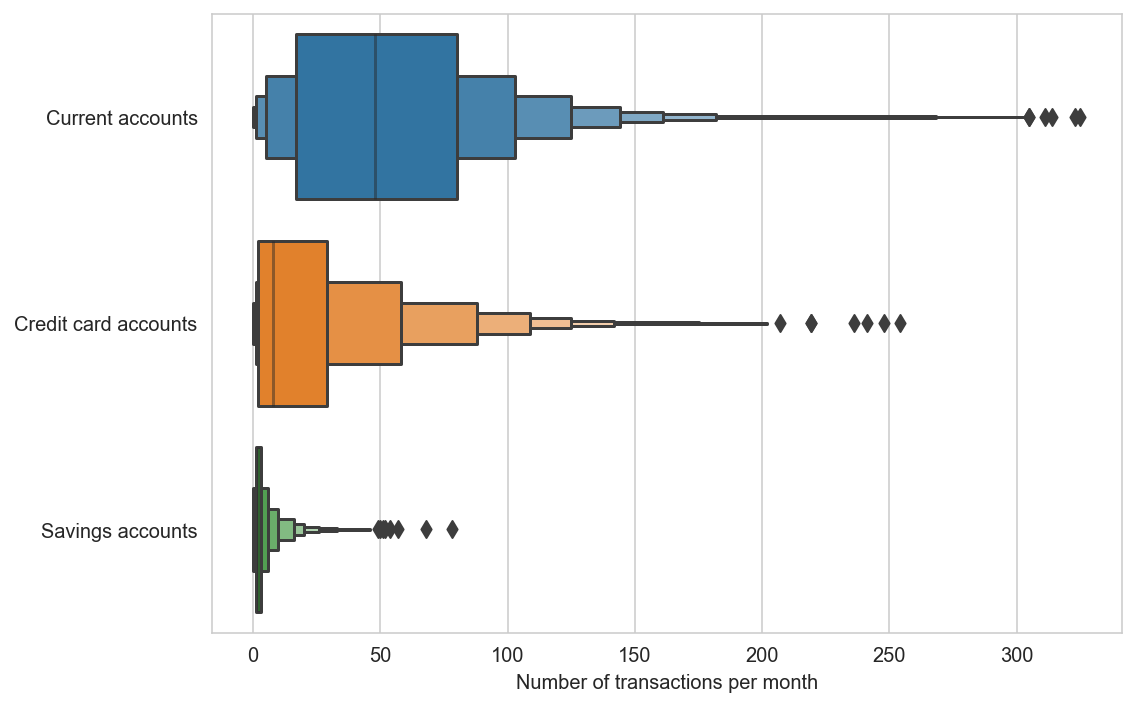

In [126]:
figs.monthly_txns_by_account_type(df, write=False)

In [127]:
df

,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,savings
0,688261,2012-01-03,777,400.000000,mdbremoved,NaN,transfers,transfers,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-11-13,True,364.220001,non merchant mbl,transfers,other account,other account,u,201201,-1542.996460,24319.220881,False
1,688264,2012-01-03,777,10.270000,9572 30dec 11 mcdonalds restaurant winwick road gb,mcdonalds,spend,services,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2015-03-19,True,364.220001,mcdonalds,dining and drinking,NaN,dining and drinking,u,201201,-1542.996460,24319.220881,False
2,688263,2012-01-03,777,6.680000,9572 31dec 11 tesco stores 3345 warrington gb,tesco,spend,household,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-08-15,True,364.220001,tesco supermarket,"food, groceries, household",NaN,supermarket,u,201201,-1542.996460,24319.220881,False
3,688265,2012-01-03,777,12.000000,9572 31dec 11 tesco stores 3345 warrington gb,tesco,spend,household,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-08-15,True,364.220001,tesco supermarket,"food, groceries, household",NaN,supermarket,u,201201,-1542.996460,24319.220881,False
4,688262,2012-01-03,777,3.030000,aviva pa,aviva,spend,finance,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-08-15,True,364.220001,aviva,health insurance,life insurance,life insurance,u,201201,-1542.996460,24319.220881,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673272,802761344,2020-07-29,587177,67.559998,aldi cd 4914,aldi,spend,household,False,cm12 0,2020-06-13,30k to 40k,1964.0,2020-06-13,1708060,2020-08-16 11:46:00,tsb,current,2020-07-31,1900-01-01,True,3263.830078,aldi,"food, groceries, household",NaN,"food, groceries, household",c,202007,3763.830078,37865.039062,False
673273,802761345,2020-07-29,587177,414.670013,mdbremoved,NaN,None,None,False,cm12 0,2020-06-13,30k to 40k,1964.0,2020-06-13,1708060,2020-08-16 11:46:00,tsb,current,2020-07-31,1900-01-01,True,3263.830078,NaN,NaN,repayments,repayments,c,202007,3763.830078,37865.039062,False
673274,802761325,2020-07-30,587177,200.000000,regular transfer payment to mdbremoved mandate no 14,NaN,None,transfers,False,cm12 0,2020-06-13,30k to 40k,1964.0,2020-06-14,1708319,2020-08-16 08:35:00,santander,current,2020-07-31,1900-01-01,True,18552.080078,NaN,NaN,NaN,NaN,c,202007,18052.080078,37865.039062,False
673275,803229644,2020-07-31,587177,500.000000,santander 123 a c mdbremoved,santander bank,transfers,transfers,False,cm12 0,2020-06-13,30k to 40k,1964.0,2020-06-13,1708060,2020-08-16 11:46:00,tsb,current,2020-08-01,1900-01-01,True,3263.830078,santander bank,transfers,NaN,transfers,c,202007,3263.830078,37865.039062,False
